## Project Overview

**This project aims to classify worker images as Safe (wearing a harness) or Not Safe (without a harness) using a Convolutional Neural Network (CNN).
The goal is to automate safety compliance monitoring in industrial environments.**

## Dataset Composition

- Total images: 538 labeled worker images

- Classes:

    - Safe — worker wearing a harness

    - Not Safe — worker without a harness

#### 1. Install Dependecies and Setup

I set up TensorFlow to detect any available GPUs, allow it to use memory as needed, and list the GPUs on my system.

In [1]:
import tensorflow as tf
import os

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

 #### 2. Image Loading and Display


I imported the needed libraries and loaded an image from my folders using OpenCV. Then, I displayed the image with Matplotlib, converting the colors from BGR (the OpenCV default) to RGB (which Matplotlib requires).

In [4]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [5]:
data_dir = './'  

In [6]:
os.listdir(data_dir)

['Not_Safe', 'Safe']

In [7]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [8]:
img = cv2.imread(os.path.join('C:/Users/82109/Desktop/Image_classification/data' , 'Safe', '5042.jpg'))

In [9]:
img.shape

(600, 300, 3)

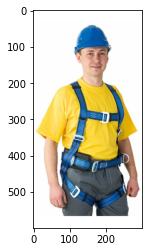

In [10]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

#### 3. Image Validation

Next, I created a loop to check the images in the directory. It looks at the file extensions to see if they match the allowed list and deletes files with invalid extensions. The loop also takes care of any errors that might happen during this process.

In [11]:
for image_class in os.listdir(data_dir): 
    
    # Iterate through image classes and images, reading each image file
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            
            # Check if the image file is of a valid type, and remove it if not
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

#### 4. Image Dataset Preparation


I loaded the image dataset and displayed a few images along with their labels. The dataset is also normalized by scaling the pixel values to a range between 0 and 1.

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
data = tf.keras.utils.image_dataset_from_directory('C:/Users/82109/Desktop/Image_classification/data')

Found 538 files belonging to 2 classes.


In [14]:
data_iterator = data.as_numpy_iterator()

In [15]:
batch = data_iterator.next()

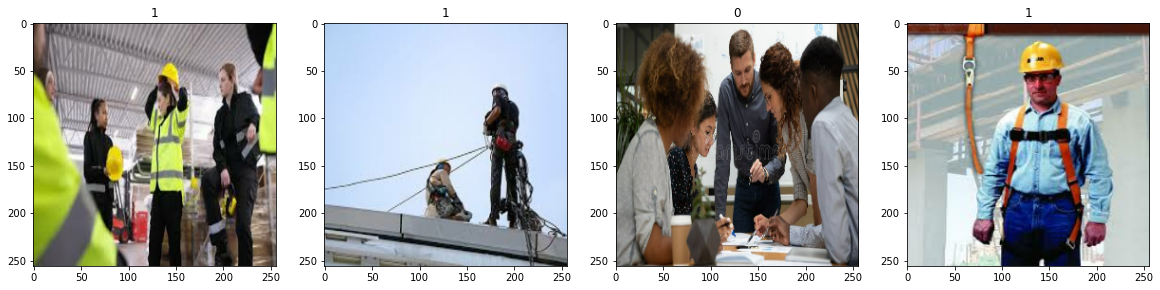

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [17]:
# Normalize image data by scaling pixel values to the range 0-1
data = data.map(lambda x,y: (x/255, y))

In [18]:
data.as_numpy_iterator().next()

(array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 7.84313772e-03],
          ...,
          [0.00000000e+00, 2.77267158e-01, 5.04718125e-01],
          [3.76838236e-03, 2.90042907e-01, 5.05729139e-01],
          [0.00000000e+00, 2.89644599e-01, 5.05330861e-01]],
 
         [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [1.26641965e-03, 1.26641965e-03, 1.26641965e-03],
          [0.00000000e+00, 0.00000000e+00, 7.84313772e-03],
          ...,
          [0.00000000e+00, 2.62231201e-01, 4.77917492e-01],
          [0.00000000e+00, 2.74509817e-01, 4.90196079e-01],
          [0.00000000e+00, 2.78826296e-01, 4.94512588e-01]],
 
         [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          ...,
          [0.00000000e+00, 2.50980407e-01, 4.5882

#### 5. Splitting Dataset 

Split the dataset into training, validation, and test sets based on proportions. 

In [19]:
# Split the dataset into 70% training, 20% validation, and 10% testing sets
train_size = int(len(data)*.7)
val_size = int(len(data)*.2) 
test_size = int(len(data)*.1) 

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size) 
test = data.skip(train_size+val_size).take(test_size)

In [21]:
len(test)

1

In [22]:
train_size + val_size + test_size

15

#### 6. Building Deep Learning Model

I built a Keras CNN model with three convolutional layers and max pooling to find image features. Then, I added a flattening layer and two dense layers. 

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [24]:
model = Sequential()

In [25]:
# Build a CNN model with Conv2D, MaxPooling, and Dense layers for binary classification
# Use 'relu' activation for hidden layers and 'sigmoid' for binary output

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

#### 7. Training Model and Logging

I trained the model for 20 epochs with TensorBoard logging turned on to track progress. 

In [28]:
logdir='logs'

In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

Early stopping was used to stop training when the validation loss stopped improving, and the best weights were restored to avoid overfitting.

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)
hist = model.fit(train,  epochs=20, validation_data=val, callbacks=[early_stopping])

Epoch 1/20
11/11 [==============================] - 10s 506ms/step - loss: 0.8861 - accuracy: 0.4943 - val_loss: 0.6895 - val_accuracy: 0.5208
Epoch 2/20
11/11 [==============================] - 5s 416ms/step - loss: 0.6871 - accuracy: 0.6051 - val_loss: 0.6762 - val_accuracy: 0.6979
Epoch 3/20
11/11 [==============================] - 5s 410ms/step - loss: 0.6630 - accuracy: 0.6420 - val_loss: 0.6327 - val_accuracy: 0.8333
Epoch 4/20
11/11 [==============================] - 5s 389ms/step - loss: 0.5969 - accuracy: 0.7784 - val_loss: 0.5459 - val_accuracy: 0.7708
Epoch 5/20
11/11 [==============================] - 5s 365ms/step - loss: 0.5069 - accuracy: 0.7727 - val_loss: 0.3547 - val_accuracy: 0.8542
Epoch 6/20
11/11 [==============================] - 5s 379ms/step - loss: 0.4124 - accuracy: 0.8409 - val_loss: 0.3756 - val_accuracy: 0.8438


#### 8. Plotting Training Results

These plots visualize the training and validation loss and accuracy over epochs.

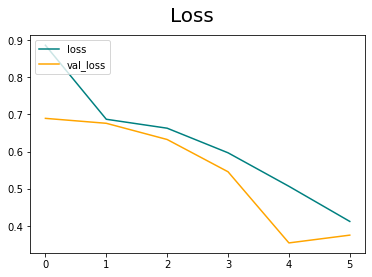

In [32]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

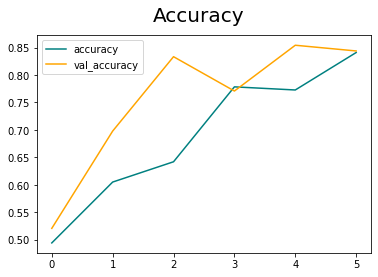

In [33]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#### 9. Evaluation on Test Set

Precision, Recall, and Binary Accuracy are computed for the test set to evaluate model performance.

In [34]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [35]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [36]:
# Make predictions and update precision, recall, and accuracy for each test batch
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [37]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.93333334, shape=(), dtype=float32) tf.Tensor(0.8235294, shape=(), dtype=float32) tf.Tensor(0.875, shape=(), dtype=float32)


The model is performing well overall, with strong precision and a good balance between recall and accuracy.

#### Precision: 93.33%  Recall: 82.35%  Accuracy: 87.5%


#### 10. Image Prediction

Finally, for the last process, a image is loaded, resized, and passed through the model for prediction. The result is used to determine the class of the image.

In [38]:
import cv2

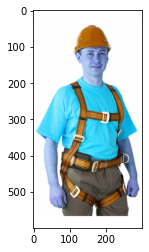

In [39]:
img =cv2.imread(os.path.join('C:/Users/82109/Desktop/Image_classification/data' , 'Safe', '5042.jpg'))
plt.imshow(img)
plt.show()

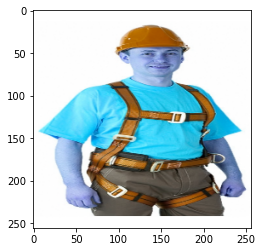

In [40]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [41]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [42]:
yhat

array([[0.95276713]], dtype=float32)

In [43]:
if yhat > 0.5: 
    print(f'Predicted class is Safe')
else:
    print(f'Predicted class is Not Safe')

Predicted class is Safe
